In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import  classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
from simpletransformers.language_representation import RepresentationModel

# Carregando base de dados  pré-processada

In [2]:
database = pd.read_csv("../../Database/dataBaseWithNER.csv")

database = database.drop(columns=["Unnamed: 0"])
database = database.dropna()
target = database["target"].values.tolist()
database

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in database["email"]:
    emailsText.append(email)

In [4]:
print(len(emailsText))

33341


# Representação vetorial BERT

In [5]:
model=RepresentationModel(
    model_type="bert",
    model_name="bert-base-uncased",
    use_cuda=True,
    #fp16=True
)

vectorialRepresentation = model.encode_sentences(emailsText, combine_strategy="mean")
vectorialRepresentation.shape

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(33341, 768)

In [6]:
bertDataframe = pd.DataFrame(vectorialRepresentation)
bertDataframe

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.159553,-0.150816,0.321128,0.112347,0.460089,0.077063,0.211739,0.108777,-0.041570,-0.183648,...,0.251322,-0.163090,-0.116672,-0.070897,-0.048261,-0.038046,-0.119423,-0.189979,-0.203577,0.074830
1,0.070952,0.006404,0.291190,-0.089379,0.006157,0.019440,0.109201,0.027035,0.204864,-0.180318,...,0.284078,-0.540378,0.049634,-0.095834,-0.203846,0.091198,-0.145186,-0.096682,-0.136018,0.060139
2,-0.151533,-0.164775,0.471505,-0.066886,0.267365,0.017289,-0.074813,0.166573,-0.042066,-0.080084,...,0.109013,-0.118258,-0.086663,-0.057181,0.129624,-0.022083,-0.200116,-0.175273,-0.030089,0.166042
3,-0.091716,-0.252400,0.291633,0.153981,0.285979,-0.033652,-0.024058,0.107529,-0.000421,-0.192826,...,0.225302,-0.128236,-0.235422,-0.151800,-0.025575,0.023563,0.072374,-0.086645,-0.004330,0.172868
4,-0.028898,-0.141465,0.607448,0.108890,0.401005,-0.087918,-0.108532,0.262347,-0.031500,-0.208509,...,-0.080739,-0.173417,0.043105,-0.124839,-0.122909,-0.152902,-0.130324,-0.272244,-0.106160,-0.142332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,-0.201098,-0.001969,0.590607,-0.040229,0.472562,0.059023,-0.223832,0.168828,-0.019873,-0.068376,...,-0.283860,0.086202,0.281307,0.030312,0.144898,-0.240447,-0.269988,-0.195940,-0.090486,-0.038796
33337,0.045740,-0.145608,0.600360,0.147581,0.138631,-0.070993,0.243974,0.133435,-0.177950,-0.203580,...,0.008339,-0.050872,0.085878,-0.260436,-0.009706,0.090684,-0.170141,-0.095879,-0.061790,-0.136188
33338,-0.052077,-0.027866,0.484033,0.026290,0.134793,0.034995,0.068102,0.120313,0.002370,-0.294557,...,-0.157311,-0.069535,0.014125,-0.028484,0.019479,-0.002767,-0.119000,0.022510,0.061531,0.090211
33339,-0.226731,-0.098042,0.446046,-0.028436,0.256239,0.029841,-0.050164,0.159660,0.134295,-0.035668,...,-0.012510,-0.048927,0.105833,-0.004867,0.282995,-0.077585,-0.224406,-0.029125,-0.032552,-0.195620


# Visualização de dados com TSNE

In [7]:
model = TSNE(n_components=2, random_state=0)
array_red = model.fit_transform(bertDataframe)

df_tsne = pd.DataFrame(array_red)

df_tsne['Target'] = target
print(df_tsne)

C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


               0          1  Target
0     -70.724075 -24.477068       0
1      -7.011187 -35.535732       0
2      45.390484 -45.507298       0
3       5.692472 -70.105087       0
4       8.255614 -24.578735       0
...          ...        ...     ...
33336  51.286816  40.035370       1
33337 -31.914318  -2.958850       1
33338 -31.201080 -12.321815       1
33339  21.174614 -47.474796       0
33340 -19.297724  25.388149       1

[33341 rows x 3 columns]


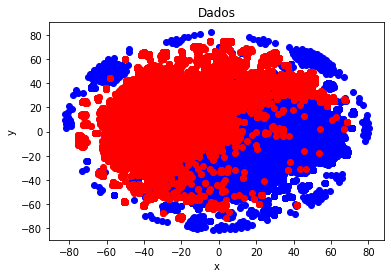

In [8]:
df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Validação

In [9]:
def getModel():
    return RandomForestClassifier()

In [10]:
X_treino, X_teste, y_treino, y_teste = train_test_split(bertDataframe.values,target,test_size=0.2)
modelo = getModel().fit(X_treino,y_treino)
score = modelo.score(X_teste,y_teste)
score

0.9641625431099116

In [11]:
scores = cross_val_score(getModel(),bertDataframe.values,target,cv=10)

scores.mean()

0.9679673690449316

In [12]:
predicoes = cross_val_predict(getModel(), bertDataframe.values, target, cv=10)

In [13]:
print("\nClassification Report : ")
print(classification_report(target, predicoes, target_names=["Ham", "Spam"]))


Classification Report : 
              precision    recall  f1-score   support

         Ham       0.97      0.96      0.97     16493
        Spam       0.96      0.97      0.97     16848

    accuracy                           0.97     33341
   macro avg       0.97      0.97      0.97     33341
weighted avg       0.97      0.97      0.97     33341



(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

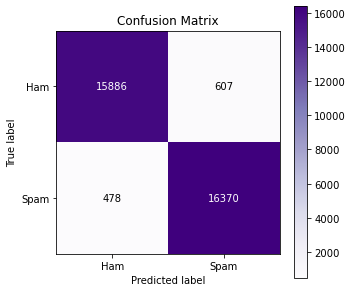

In [14]:
categories = ["Ham", "Spam"]

skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()

(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

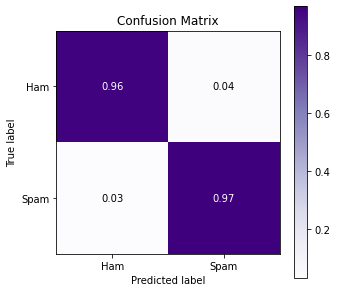

In [15]:
skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    normalize=True,
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()